# Classification Problem

In this we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website.

This data set contains the following features:

* 'Male': Whether or not consumer was male
* 'City': City of consumer
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Ad Topic Line': Headline of the advertisement
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Using the Data

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Checking the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


info and describe() on ad_data

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 62.6+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

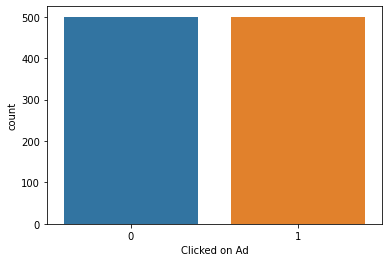

In [7]:
sns.countplot(x = 'Clicked on Ad', data = ad_data)

Text(0.5, 0, 'Age')

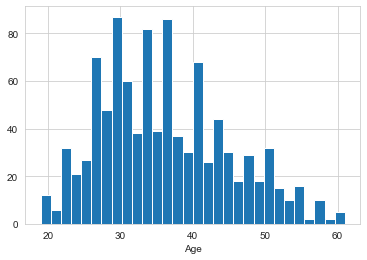

In [8]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

**Create a jointplot showing Area Income versus Age.**

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

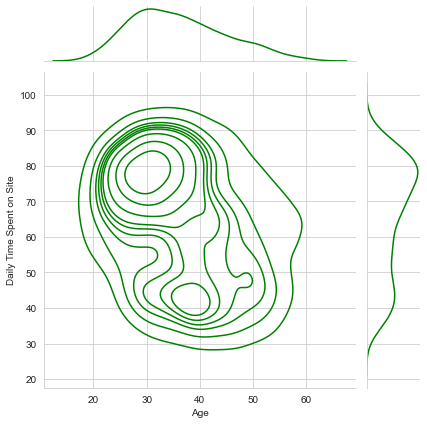

In [9]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='green',kind='kde');

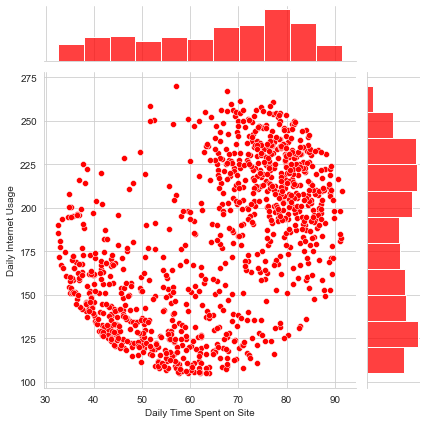

In [10]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='red')

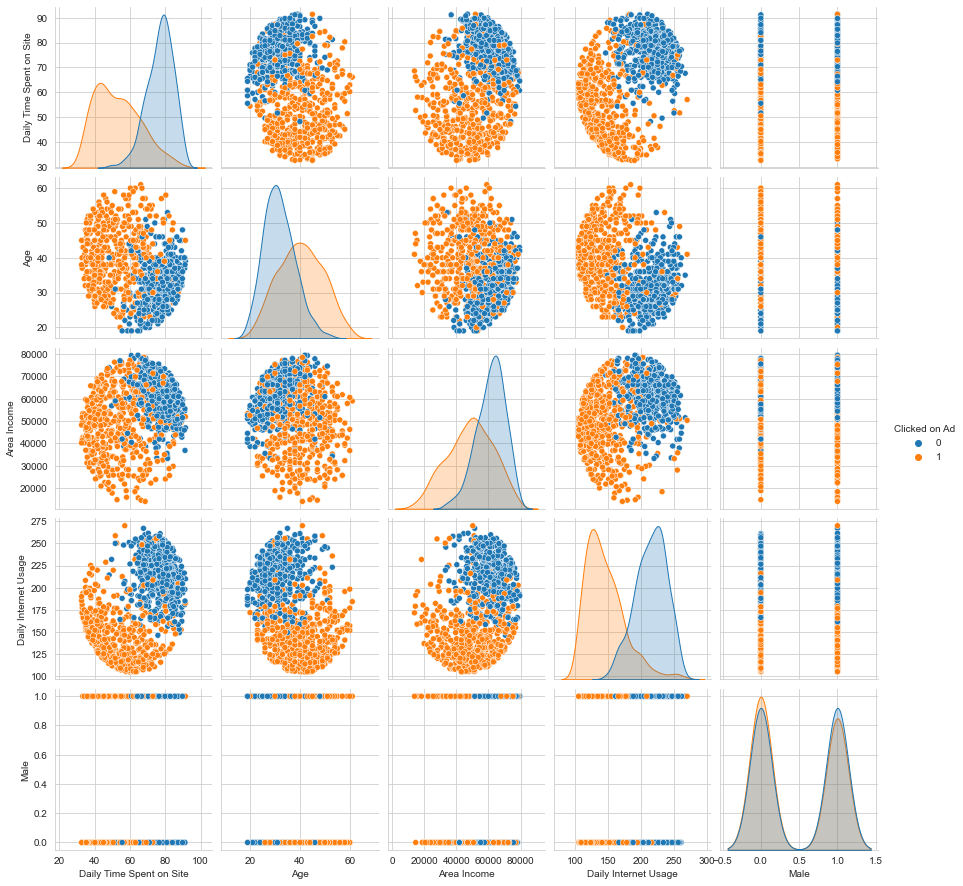

In [11]:
sns.pairplot(ad_data,hue='Clicked on Ad')

# Train test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=101)

# K Nearest Neighbours

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Predictions and Evaluations

In [17]:
pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       139
           1       0.79      0.80      0.80       131

    accuracy                           0.80       270
   macro avg       0.80      0.80      0.80       270
weighted avg       0.80      0.80      0.80       270



# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lgm = LogisticRegression()
lgm.fit(X_train,y_train)

LogisticRegression()

## Predictions and Evaluations
** Predicting values for the testing data.**

In [22]:
predictions = lgm.predict(X_test)

** Creating a classification report for the model.**

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       139
           1       0.94      0.89      0.91       131

    accuracy                           0.92       270
   macro avg       0.92      0.92      0.92       270
weighted avg       0.92      0.92      0.92       270



# Conclusion

In [25]:
#cdf = pd.DataFrame(lgm.coef_, X.columns)
print(X.columns)

In [28]:
lgm.coef_

array([[-5.30600132e-02,  2.38924586e-01, -8.64023628e-06,
        -2.51093422e-02,  1.29097081e-03]])

In [26]:
cdf = pd.DataFrame(lgm.coef_[0], X.columns)
cdf.columns = ['Coeffecient']
cdf

,Coeffecient
Daily Time Spent on Site,-0.053060
Age,0.238925
Area Income,-0.000009
Daily Internet Usage,-0.025109
Male,0.001291


In [27]:
print(confusion_matrix(y_test, predictions))

[[132   7]
 [ 15 116]]


The users that are predicted to click on commercials and the actually clicked users were 116, the people who were predicted not to click on the commercials and actually did not click on them were 132.
The people who were predicted to click on commercial and actually did not click on them are 7, and the users who were not predicted to click on the commercials and actually clicked on them are 15.

Classification Report: The precision & recall of the KNN model is 0.8 which depicts the predicted values are 80% accurate while the precision and recall of the logistic regression model is 0.92 which depicts the predicted values are 92% accurate . Thus we will be accepting the Logistic Regression model as it has higher accuracy. Hence the probability that the user can click on the commercial is 0.92 which is a great precision value to get a good model.
